<h3 align = 'center'> Análisis de Ventas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carga de archivo CSV (creado con datos ficticios)

df = pd.read_csv('./ventas_electrodomesticos_diciembre_xmas.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Sucursal            14400 non-null  object
 1   País                14400 non-null  object
 2   Ciudad              14400 non-null  object
 3   Mes                 14400 non-null  object
 4   Categoría           14400 non-null  object
 5   Ventas              14400 non-null  int64 
 6   Empleados Sucursal  14400 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 787.6+ KB


Total anual y promedio mensual (Global)

In [3]:
# Total global de ventas

total_ventas = df['Ventas'].sum()
print(f"Total global de ventas del año: ${total_ventas}")

# Promedio global de ventas mensual

promedio_mensual = df.groupby('Mes')['Ventas'].sum().mean()
promedio_mensual = round(promedio_mensual,2)
print(f"Promedio gobal de ventas mensual: ${promedio_mensual}")

Total global de ventas del año: $796914327
Promedio gobal de ventas mensual: $66409527.25


Total anual por pais y ciudad

In [4]:
# Total de ventas agrupado por país en orden descendente
ventas_pais_total = df.groupby('País')['Ventas'].sum().sort_values(ascending=False)
print(f"Total anual de ventas por País\n{ventas_pais_total}")

# Total de ventas agrupado por país
ventas_ciudad_total = df.groupby(['País','Ciudad'])['Ventas'].sum()
print(f"\nTotal anual de ventas por Ciudad\n{ventas_ciudad_total}")

Total anual de ventas por País
País
Chile        174972014
México       174347594
Colombia     169051400
Perú         166127652
Argentina    112415667
Name: Ventas, dtype: int64

Total anual de ventas por Ciudad
País       Ciudad          
Argentina  Buenos Aires         44696893
           Córdoba              67718774
Chile      Santiago             76850262
           Valparaíso           98121752
Colombia   Bogotá              105953783
           Medellín             63097617
México     Ciudad de México     98842220
           Guadalajara          75505374
Perú       Arequipa            112445254
           Lima                 53682398
Name: Ventas, dtype: int64


Promedio mensual por país y ciudad

In [5]:
# Promedio mensual de ventas por país

ventas_mensuales_pais = df.groupby('País')['Ventas'].mean()
ventas_mensuales_pais = round( ventas_mensuales_pais, 2)
print(f"Ventas mensuales promedio por país\n{ventas_mensuales_pais}\n")

# Promeido mensual de ventas por ciudad

ventas_mensuales_ciudad = df.groupby(['País', 'Ciudad'])['Ventas'].mean()
ventas_mensuales_ciudad = round( ventas_mensuales_ciudad, 2)
print(f"Ventas mensuales promedio por ciudad\n{ventas_mensuales_ciudad}")

Ventas mensuales promedio por país
País
Argentina    36030.66
Chile        66277.28
Colombia     59693.29
México       63723.54
Perú         54078.01
Name: Ventas, dtype: float64

Ventas mensuales promedio por ciudad
País       Ciudad          
Argentina  Buenos Aires        35814.82
           Córdoba             36174.56
Chile      Santiago            61578.74
           Valparaíso          70489.76
Colombia   Bogotá              76116.22
           Medellín            43817.79
México     Ciudad de México    79200.50
           Guadalajara         50742.86
Perú       Arequipa            65072.48
           Lima                39942.26
Name: Ventas, dtype: float64


Análisis por categoría

In [6]:
# Ventas anuales totales agrupadas por categoría

ventas_por_categoría = df.groupby('Categoría')['Ventas'].sum().sort_values(ascending=False)
print(f"Ventas anuales por categoría\n{ventas_por_categoría}\n")

# Ventas anuales totales por pais y por categoría

ventas_pais_categoria = df.groupby(['País', 'Categoría'])['Ventas'].sum().unstack().fillna(0)
print(f"Ventas anuales totales por país y por categoría\n {ventas_pais_categoria}")

Ventas anuales por categoría
Categoría
Televisores       252023553
Lavadoras         190236811
Microondas        186366184
Refrigeradores    168287779
Name: Ventas, dtype: int64

Ventas anuales totales por país y por categoría
 Categoría  Lavadoras  Microondas  Refrigeradores  Televisores
País                                                         
Argentina   17849588    17557750        59802533     17205796
Chile       91203435    27977333        27500860     28290386
Colombia    26791210    26663828        27086311     88510051
México      27821087    27325128        27676079     91525300
Perú        26571491    86842145        26221996     26492020


Evolución mensual de ventas

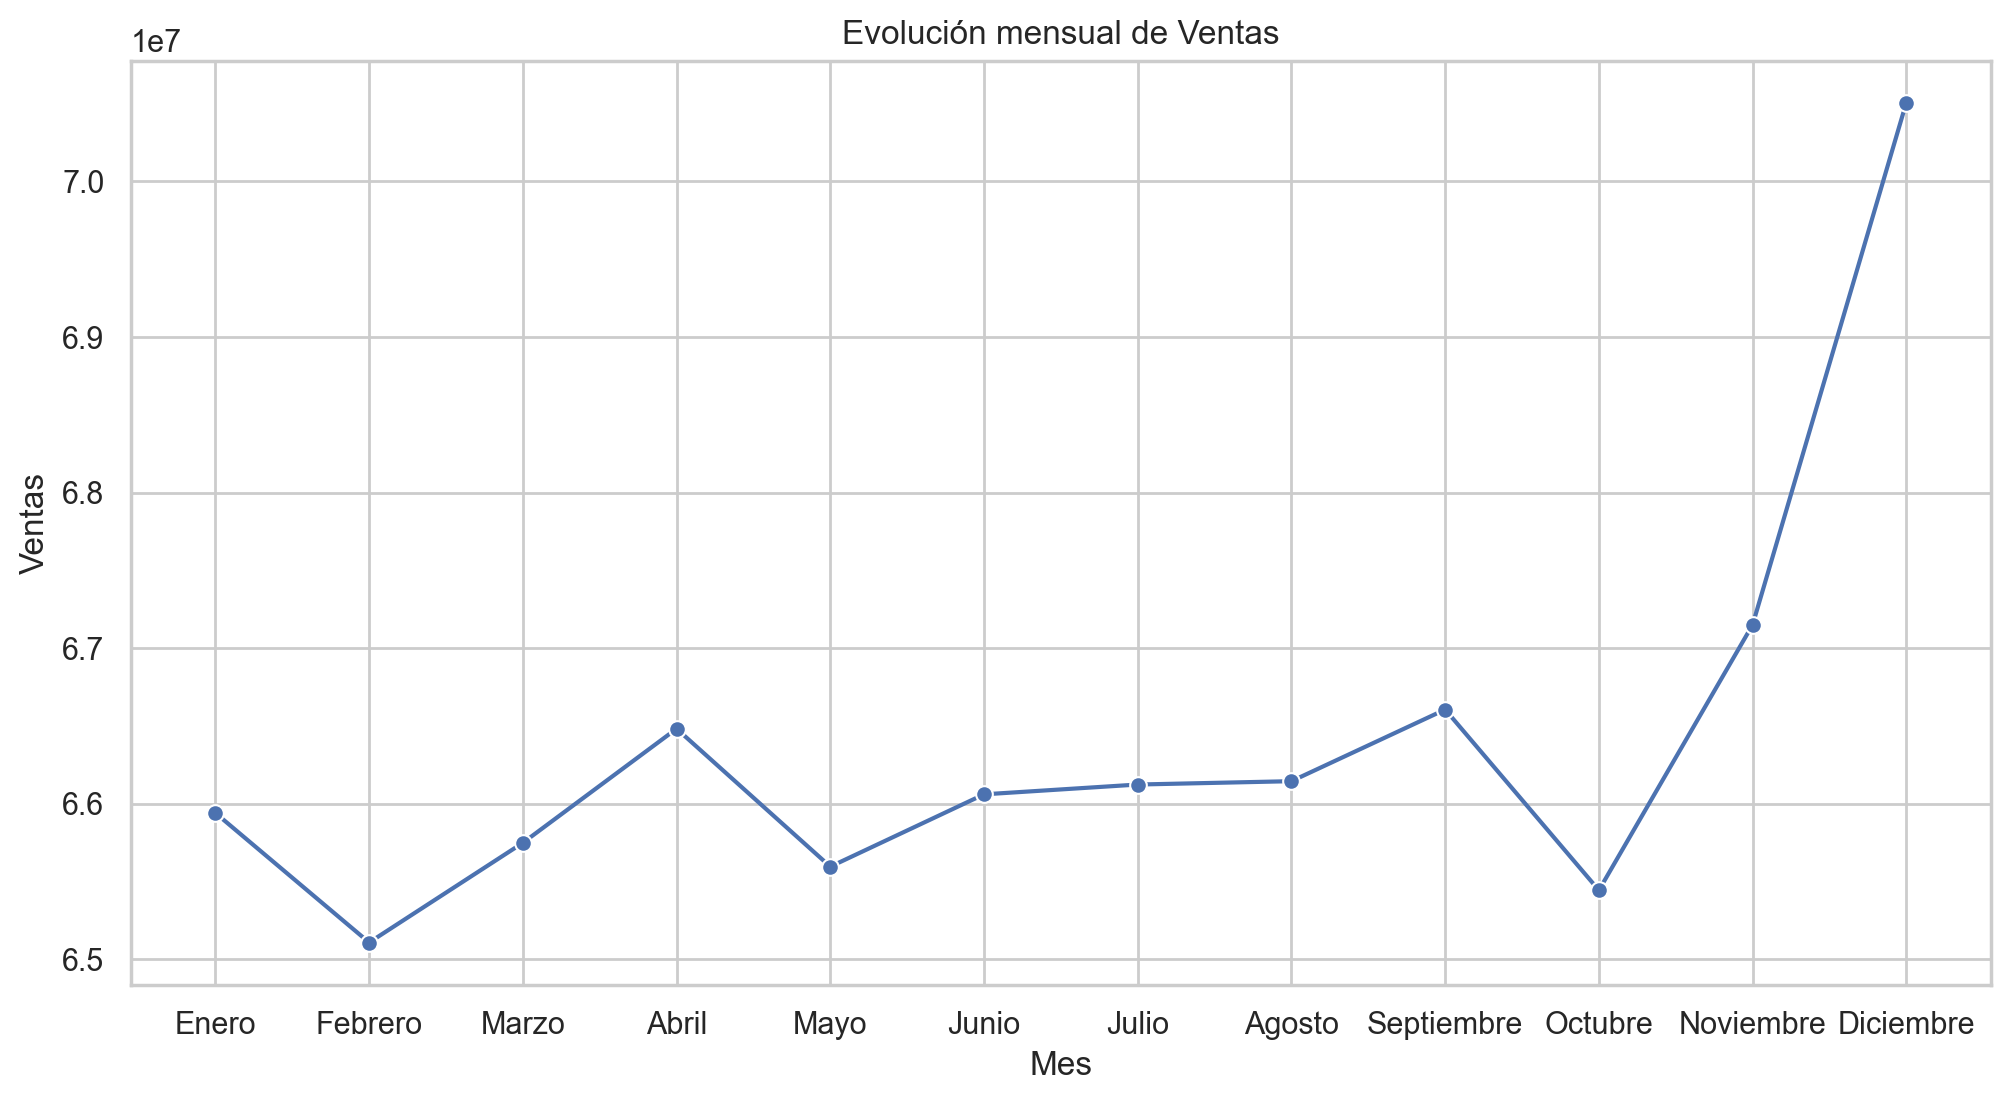

In [7]:
ventas_mensuales = df.groupby('Mes')['Ventas'].sum().reset_index()
ventas_mensuales

plt.figure(figsize=(12, 6), dpi = 200)

sns.set_theme(style = 'whitegrid')
sns.lineplot(
    data = ventas_mensuales,
    x = 'Mes',
    y = 'Ventas',
    marker= 'o'
)

plt.title("Evolución mensual de Ventas")

plt.xticks(range(12),
    ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
);

<p align ='center'> Podemos observar un incremento estacionario en diciembre de ventas a nivel global

Ventas por país

Text(0, 0.5, 'Ventas')

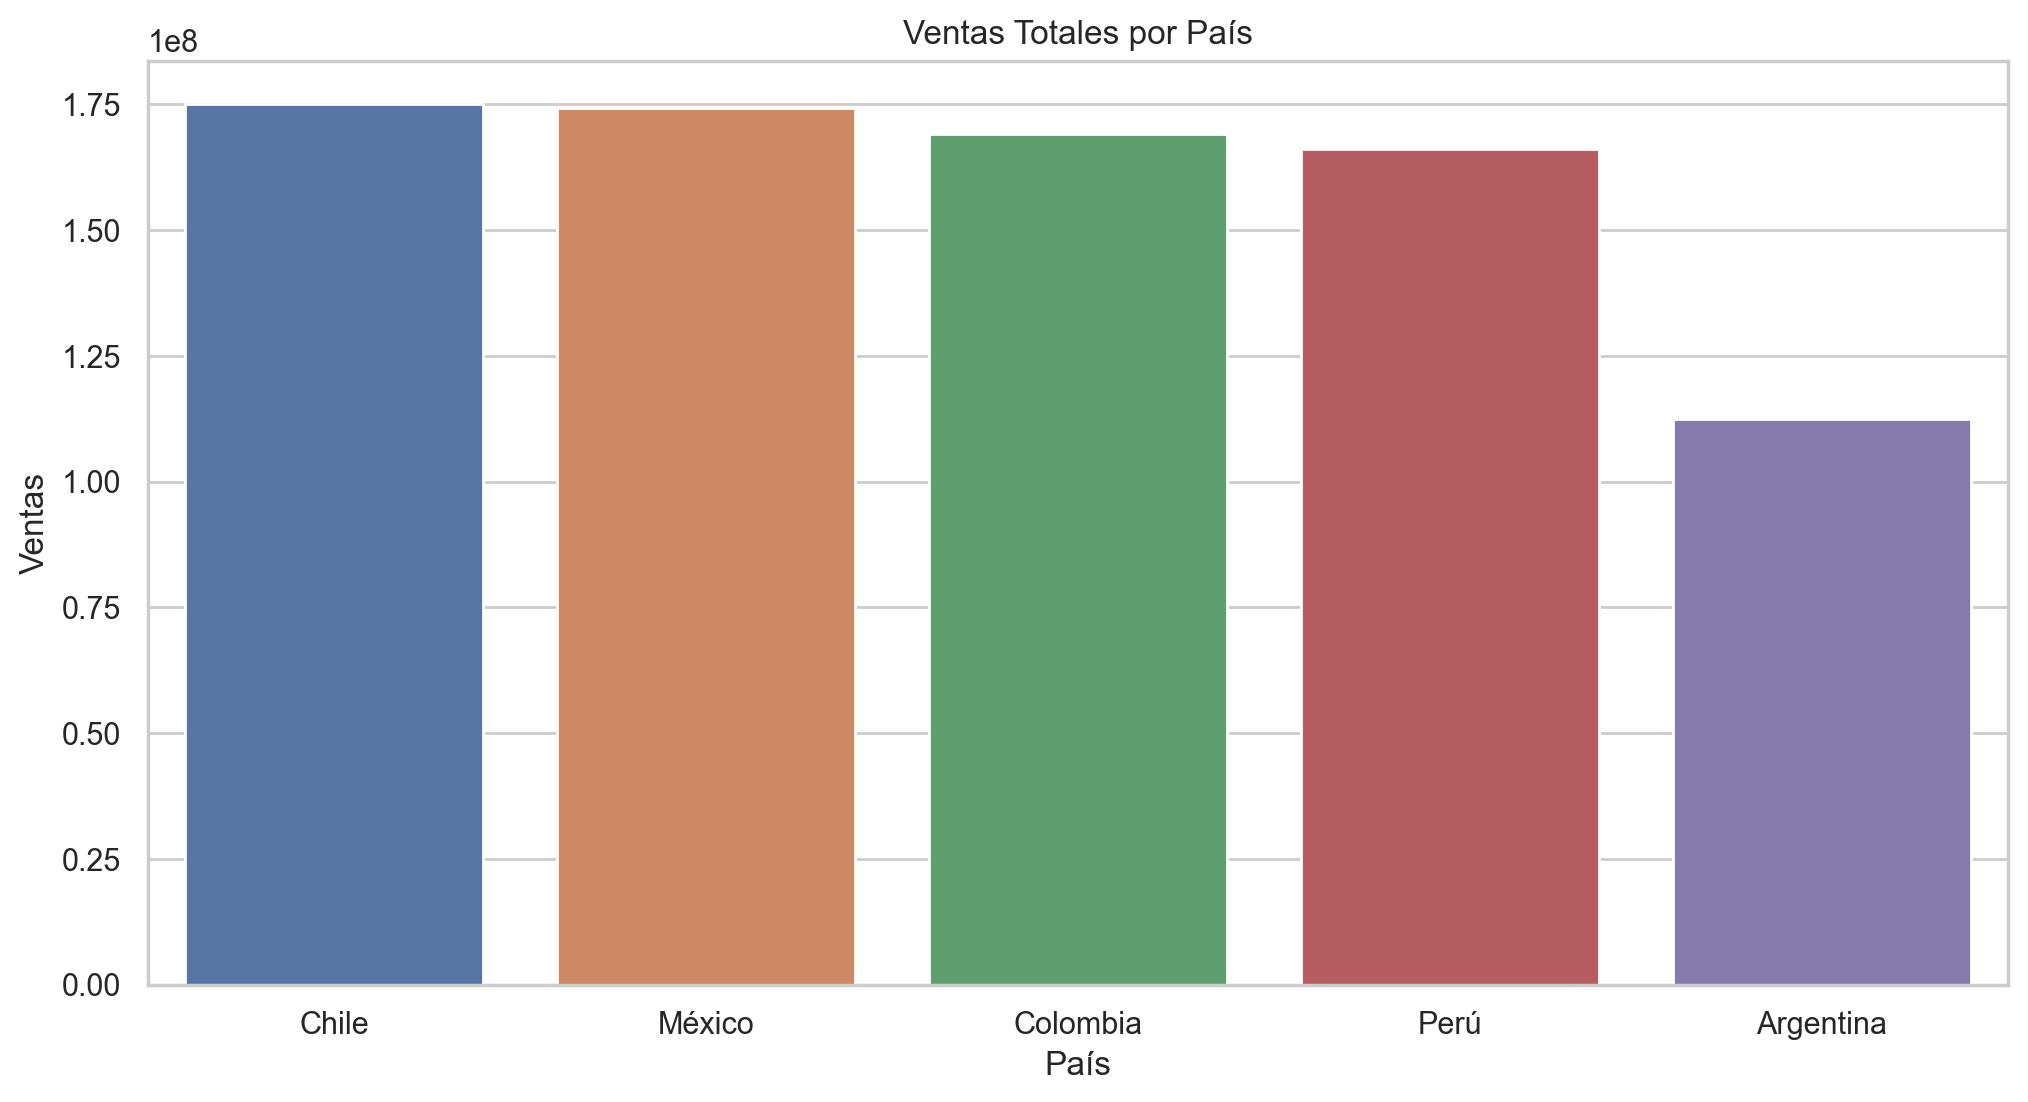

In [8]:
plt.figure(figsize=(12, 6), dpi = 200)

sns.barplot(
    x = ventas_pais_total.index,
    y = ventas_pais_total.values,
    hue = ventas_pais_total.index
)

plt.title('Ventas Totales por País')
plt.ylabel('Ventas')

Mapa de calor de Ventas por categoría y país

In [9]:
# Cambo del tipo de datos de cada columna a float para que no haya truncamiento 
# en el redondeo de numeros de la magnitud de los que componen el DataFrame

ventas_pais_categoria = ventas_pais_categoria.astype({'Lavadoras' : float,
                                                      'Microondas' : float,
                                                      'Refrigeradores' : float,
                                                      'Televisores' : float})

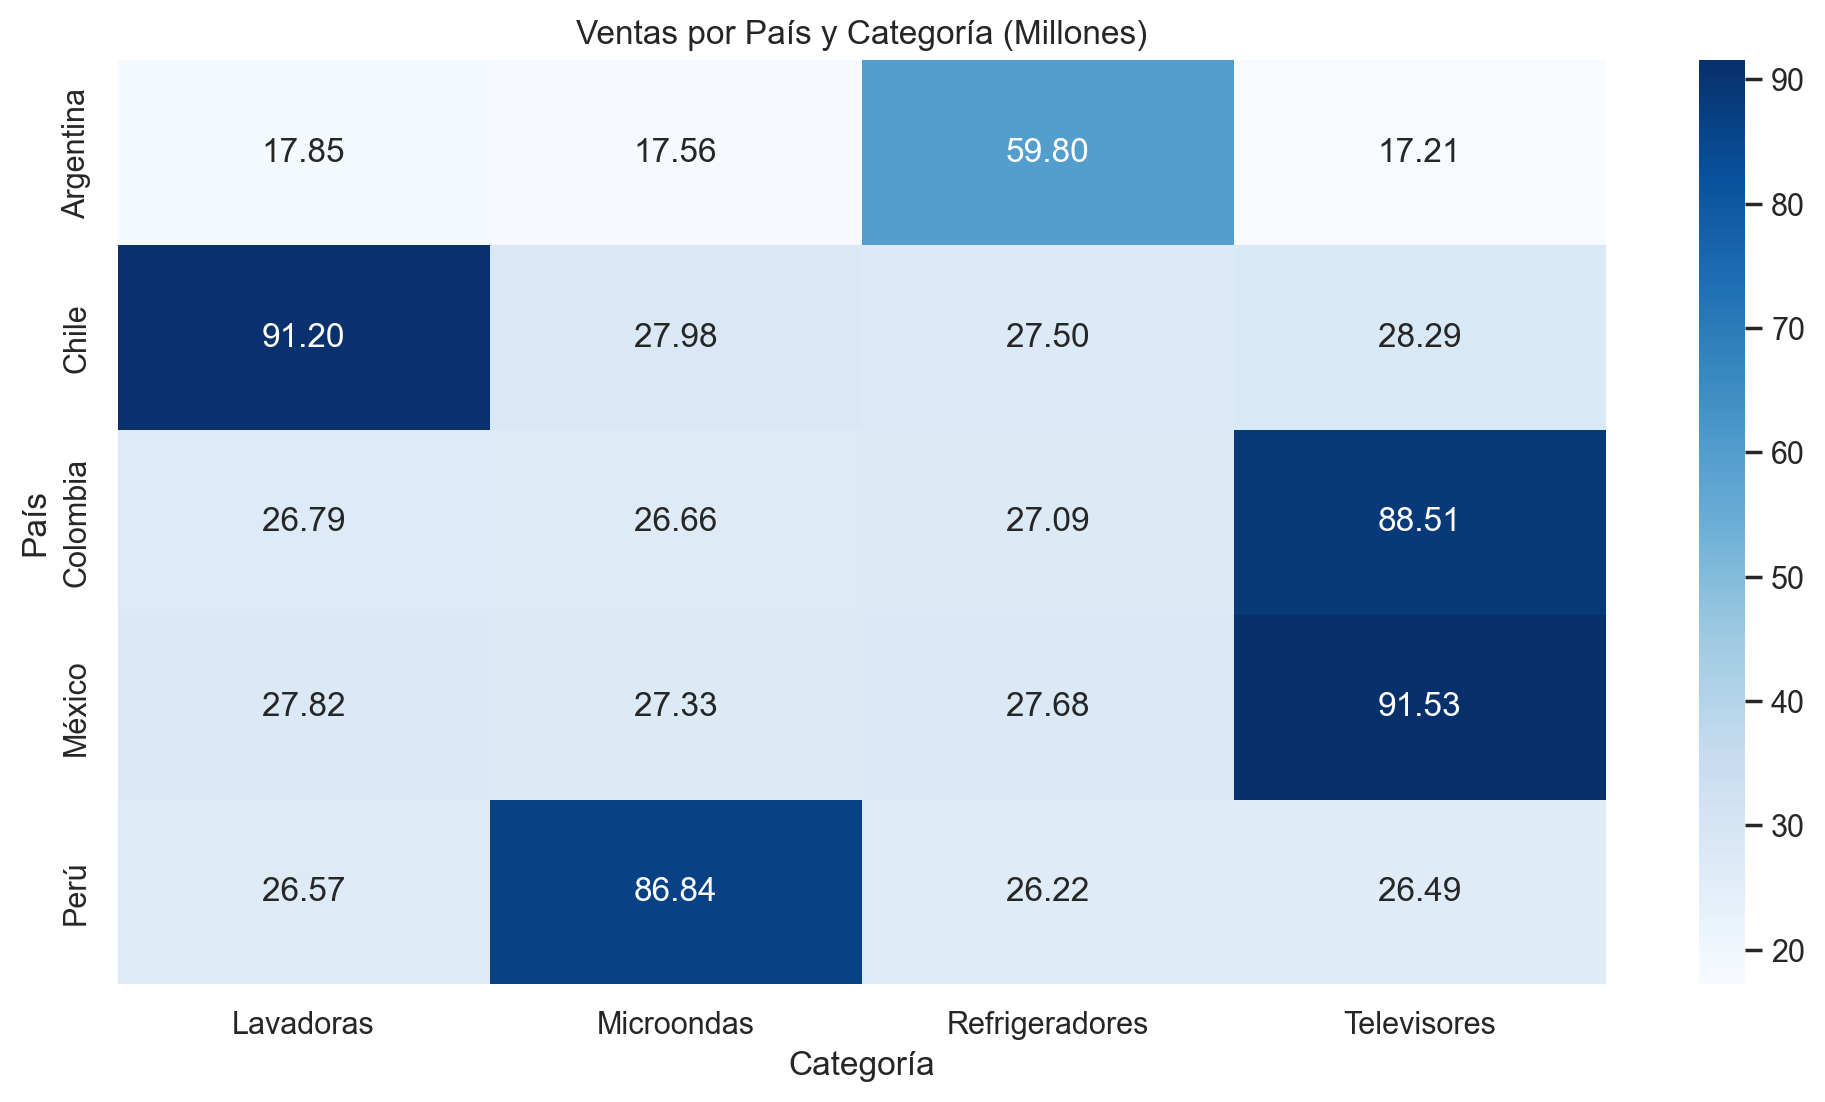

In [ ]:
# Grafico de calor 

plt.figure(figsize=(12, 6), dpi = 200)

sns.heatmap(
    data = ventas_pais_categoria/1000000,
    annot = True,
    cmap = 'Blues',
    fmt = ".2f"
)
plt.title('Ventas por País y Categoría (Millones)');

<p align = 'center'> El grafico de calor nos muestra las categorias más vendidas / populares de cada país

Productividad: Ventas por empleado

In [11]:

# Creando columan de ventas promedio por empleado a partir de un promedio simple

df['Ventas por Empleado'] = df['Ventas'] / df['Empleados Sucursal']
df['Ventas por Empleado'] = df['Ventas por Empleado'].round(2)

In [12]:
# Promedio de ventas por empleado por sucursal

ventas_por_empleado = df.groupby('Sucursal')['Ventas por Empleado'].mean().sort_values(ascending=False)
ventas_por_empleado = ventas_por_empleado.round(2)

# Ranking de sucursales con mejor desempeño en ventas por empleado

ventas_por_empleado.head(10)

Sucursal
Sucursal_212    2267.13
Sucursal_158    2223.11
Sucursal_215    2203.41
Sucursal_273    2193.82
Sucursal_226    2176.36
Sucursal_133    2146.01
Sucursal_296    2120.46
Sucursal_16     2100.99
Sucursal_3      2100.12
Sucursal_64     2076.32
Name: Ventas por Empleado, dtype: float64

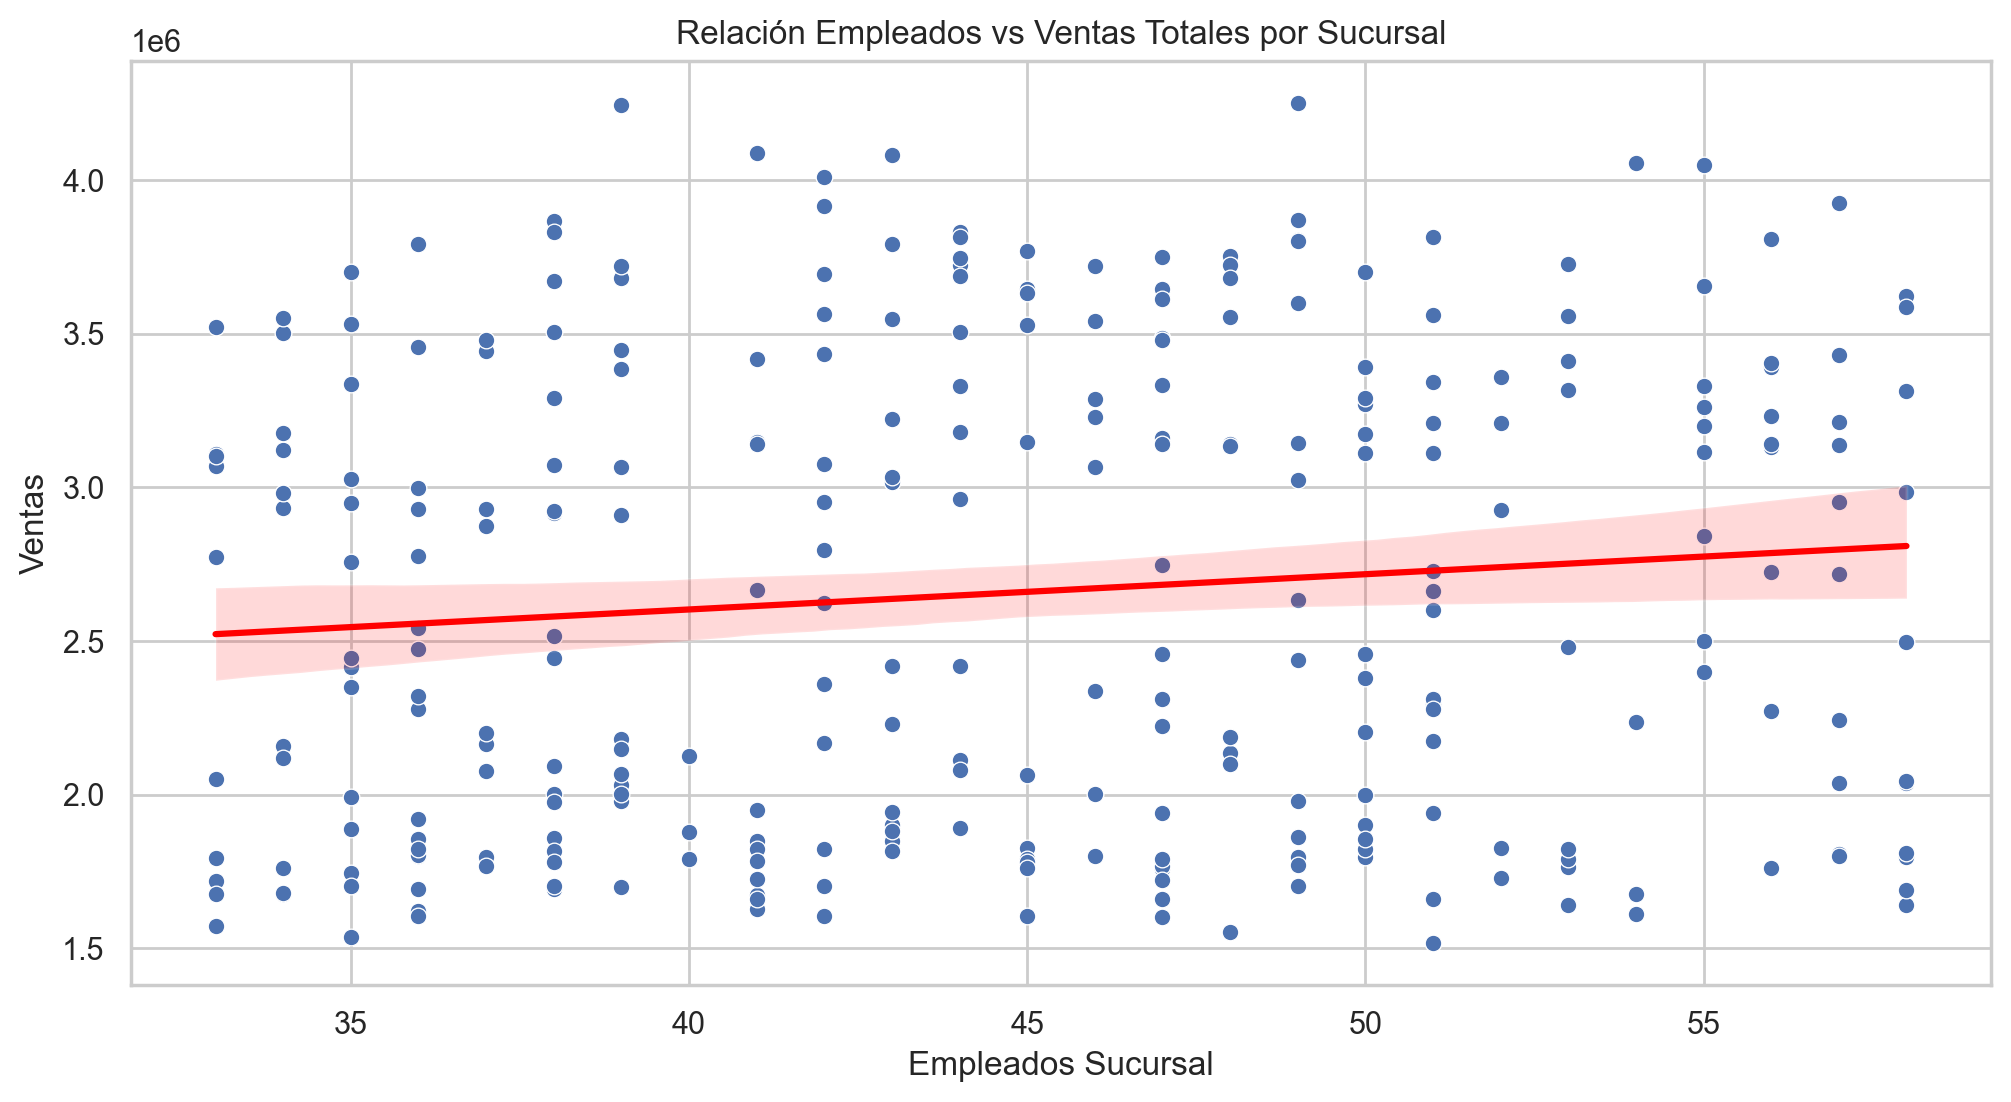

In [13]:
# Gráfico de dispersión: Empleados vs Ventas totales por sucursal

df_sucursal = df.groupby(['Sucursal', 'Empleados Sucursal']).agg({'Ventas':'sum'}).reset_index()

plt.figure(figsize = (12, 6), dpi = 200)
sns.scatterplot(
    data = df_sucursal,
    x = 'Empleados Sucursal',
    y = 'Ventas'
)
sns.regplot(data=df_sucursal, x='Empleados Sucursal', y='Ventas', scatter=False, color='red')
plt.title("Relación Empleados vs Ventas Totales por Sucursal");

Cantidad de empleados como predictor de ventas

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Separacion entre variable independiente (X) y variable dependiente (y)

X = df_sucursal[['Empleados Sucursal']]
y = df_sucursal['Ventas']

# Entrenamiento del modelo lineal

model = LinearRegression()
model.fit(X, y)


# Evaluacion de r^2, ajuste de la varianza de la variable dependiete (y) a la variabel dependiente(X)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"R^2: {r2:.3f}")


# Evalaución de pendiente, tasa de cambio de la variable dependiente (y) 
# por cada unidad de cambio en la variabel dependiente (x)

print(f"Pendiente (coef): {model.coef_[0]:.2f}")

# Evaluacion del intercepto, el valor predicho de la variable dependiente (y)
# Cuando la variable independiete es 0

print(f"Intercepto: {model.intercept_:.2f}")

R^2: 0.012
Pendiente (coef): 11473.15
Intercepto: 2143378.40


Con este R^2 tan bajo vemos que la cantidad de empleados por si sola no sirve como predictor de ventas